## Objective:
###  Evaluate training programs using different compare means techniques
### Paired test to determine the difference in the scores before and after training
### Independent Sample t-test to determine the difference between scores of employees of different genders
### anova test to determine difference between scores of employees belonging to to different departments

In [67]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [68]:
data=pd.read_excel("training.xlsx")

In [69]:
data.head(3)

,Id,Course,Department,Pre-Score,Post-Score,gender
0,1,C Programming,Hardware Engineering,0.733333,0.0,male
1,2,C Programming,Hardware Engineering,0.266667,0.0,male
2,3,C Programming,Software Engineering,0.000000,0.0,male


In [70]:
data.isnull().sum()

Id              0
Course          0
Department      0
Pre-Score       0
Post-Score    426
gender          0
dtype: int64

In [71]:
median_post_score=data['Post-Score'].median()

In [72]:
data['Post-Score'].replace(0.0,np.nan,inplace=True)

In [73]:
data['Post-Score']=data['Post-Score'].fillna(median_post_score)

In [90]:
median_post_score=data['Pre-Score'].median()
data['Pre-Score'].replace(0.0,np.nan,inplace=True)
data['Pre-Score']=data['Pre-Score'].fillna(median_post_score)

In [91]:
data.isnull().sum()

Course        0
Department    0
Pre-Score     0
Post-Score    0
gender        0
dtype: int64

In [92]:
data.head(5)

,Course,Department,Pre-Score,Post-Score,gender
0,C Programming,Hardware Engineering,0.733333,0.4,male
1,C Programming,Hardware Engineering,0.266667,0.4,male
2,C Programming,Software Engineering,0.400000,0.4,male
3,C Programming,Hardware Engineering,0.200000,0.4,female
4,C Programming,Hardware Engineering,0.400000,0.4,male


## Data Exploration

In [93]:
print(f"Dimension of the dataset:{data.shape}")

Dimension of the dataset:(1021, 5)


In [94]:
print(f"Data type of features: {data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Course      1021 non-null   object 
 1   Department  1021 non-null   object 
 2   Pre-Score   1021 non-null   float64
 3   Post-Score  1021 non-null   float64
 4   gender      1021 non-null   object 
dtypes: float64(2), object(3)
memory usage: 40.0+ KB
Data type of features: None


In [95]:
for column in data.columns:
    if data[column].dtypes==object:
        print(f"Unique categories of {column} is: {data[column].nunique()}")
        print(f"Categories of {column} are: {data[column].unique()}")
        print("*"*100)

Unique categories of Course is: 7
Categories of Course are: ['C Programming ' 'C++ Programming' 'Embedded C  ' 'Linux Fundamentals'
 'Perl Fundamentals' 'Python Programming' 'TCL/TK']
****************************************************************************************************
Unique categories of Department is: 4
Categories of Department are: ['Hardware Engineering' 'Software Engineering' 'Systems Engineering'
 'ASICS Engineering']
****************************************************************************************************
Unique categories of gender is: 2
Categories of gender are: ['male' 'female']
****************************************************************************************************


<Figure size 1440x1440 with 0 Axes>

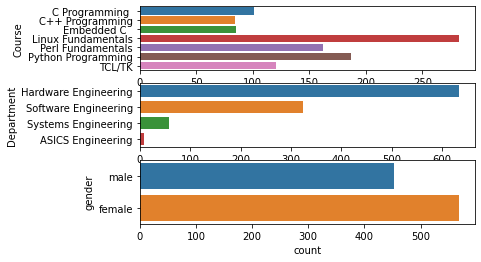

In [96]:
# count plot for the categorical variables
fig=plt.figure(figsize=(20,20))
fig,ax=plt.subplots(3,1)
sns.countplot(y=data['Course'],ax=ax[0])
sns.countplot(y=data['Department'],ax=ax[1])
sns.countplot(y=data['gender'],ax=ax[2])

plt.show()

It is clear from the above chart that Hardware Engineering department has more employees 

Also, female employees count is more than the male employees

More employees took Linux and Python courses compared to other courses

In [97]:
data.drop('Id',axis=1,inplace=True)

KeyError: "['Id'] not found in axis"

In [98]:
from scipy import stats
print(f"Statistics of Pre-Score is :\n {stats.describe(data['Pre-Score'])}")
print("*"*100)
print(f"Statistics of Post-Score is :\n {stats.describe(data['Post-Score'])}")


Statistics of Pre-Score is :
 DescribeResult(nobs=1021, minmax=(0.0662666666666667, 1.0), mean=0.49391766242246166, variance=0.04150026523566327, skewness=0.5149887188330081, kurtosis=-0.28128533669261424)
****************************************************************************************************
Statistics of Post-Score is :
 DescribeResult(nobs=1021, minmax=(0.133, 1.0), mean=0.5104302970943521, variance=0.03799188873695958, skewness=1.3641206056017254, kurtosis=0.3222977065808146)


## 1-Sample Test
stats.ttest_1samp(sample,val)

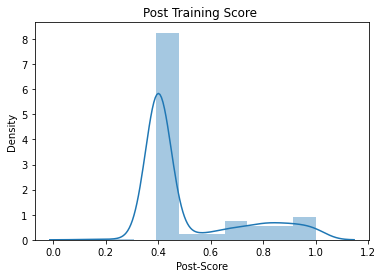

In [103]:
#Visualize post test score
sns.distplot(data['Post-Score'],bins=10).set_title('Post Training Score ')
plt.show()

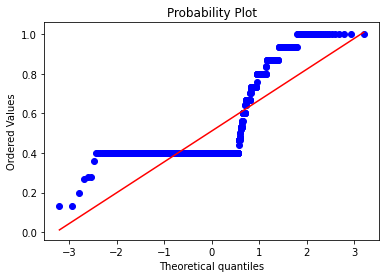

In [105]:
stats.probplot(data['Post-Score'],fit=True,plot=plt)
plt.show()

It is not normally distributed but still 1-sample t test can be applied as the sample size is >50

In [106]:
#Null Hypothesis: There is no significant difference between score after training, required score is 0.35
#1-sample t test
print(f"Result of 1-sample t test on Post-Score is: {stats.ttest_1samp(data['Post-Score'],0.35)}")

Result of 1-sample t test on Post-Score is: Ttest_1sampResult(statistic=26.29988299960844, pvalue=8.585056647194416e-117)


## Result
### Since p value is less than 0.05 (confidence level) reject the null hypothesis. This means that value significantly varies from 20

## 2. Objective
### To determine the difference between training score of employees belonging to different genders
#### Compare training effectiveness using Independent T-Test
#### stats.ttest_ind(sample_a,sample_b,equal_var=)   here sample_a, sample_b are independent samples,equal_var Boolean value representing the variance for the two groups

In [107]:
male_post_score=data[data['gender']=='male']['Post-Score']
female_post_score=data[data['gender']=='female']['Post-Score']

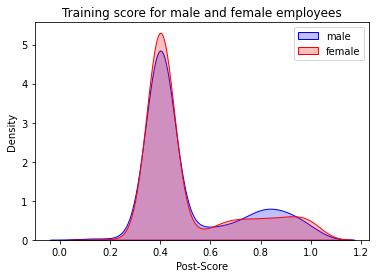

In [108]:
#Visualize the group
sns.kdeplot(male_post_score,color='blue',shade=True)
sns.kdeplot(female_post_score,color='red',shade=True)
plt.title("Training score for male and female employees")
plt.legend(['male','female'])

In [116]:
# Determining Homogenity of variances
print("Levene test",stats.levene(male_post_score,female_post_score))
print("-"*90)
print("Bartlett test:",stats.bartlett(male_post_score,female_post_score))
print("-"*90)
# Independent sample t-test
#Null Hypothesis: There is no significant difference between score of employees with different gender
print("Result of t-test",stats.ttest_ind(male_post_score,female_post_score))

Levene test LeveneResult(statistic=0.3400087213961416, pvalue=0.5599532072246245)
------------------------------------------------------------------------------------------
Bartlett test: BartlettResult(statistic=0.012472558105601154, pvalue=0.911076656047378)
------------------------------------------------------------------------------------------
Result of t-test Ttest_indResult(statistic=0.3220929959270719, pvalue=0.7474483089963659)


Result of t-test Ttest_indResult(statistic=0.3220929959270719, pvalue=0.7474483089963659)


#### Homegenity assumes that variance of each of the populations is equal. 
#### Bartlett and Levene test are used to check the homogeneity of variances. From the output it is observed that p-value of the test is >0.05 then the assumption of homogeneity is met.
#### If homogeneity assumption is not met then equal_var=False should be set in stats.ttest_ind
### Result:
#### From ttest result p-value>0.05, so we fail to reject null hypothesis
# ********************************************************************

##  3. Objective:
### To determine the difference between the scores of employees obtained before and after training
### Dependent (paired) t-test is used for dependent samples.
### Syntax: stats.ttest_rel(sample_a,sample_b)  where samples are dependent


### Null Hypothesis:
### There is no significant different between the scores obtained before and after training

In [118]:
print("Result of test is:\n",stats.ttest_rel(data['Pre-Score'],data['Post-Score']))

Result of test is:
 Ttest_relResult(statistic=-2.140152874687431, pvalue=0.03257909066143031)


since p value is <0.05 we reject the null hypothesis, which means that there is significant difference between the scores of employees before and after the training.

##*****************************
## 4.Objective:
### Determine the difference between the score of employees of different departments
### Anova (Analysis of Variance) a statistical test method is used when a comparison is to be made between more than two population means. Basic principle is to test the variances among the population means by assessing the amount of variation within group items, proportional to the amount of variation between groups.

###  stats.f_oneway(data_group1,data_group2, . . .data_groupN)  
where data_group1 etc are the different groups formed on the basis of different categorical values in independent variables
## Null Hypothesis: There is no significant difference between the scores of employees belonging to different departments after the training

Text(0.5, 1.0, 'Training score of different departments')

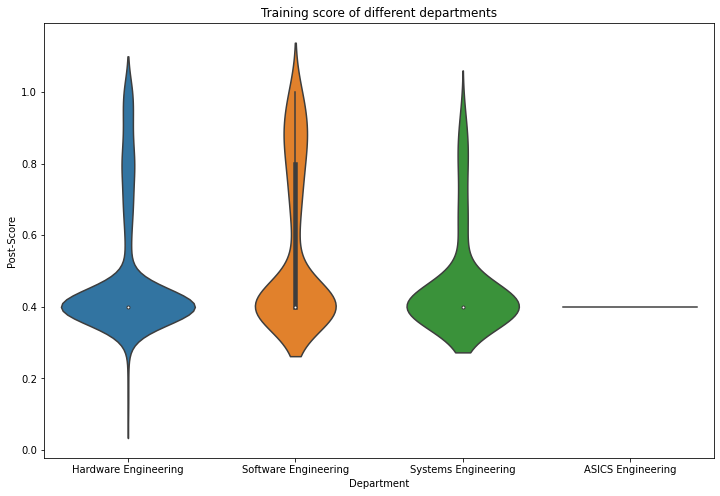

In [121]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Department',y='Post-Score',data=data).set_title("Training score of different departments")

the violin chart shows that the score is nearly same for employees belonging to all the departments except ASICS Engineering department

In [137]:
## Applying Anova test

HW=data[data['Department']=='Hardware Engineering']['Post-Score']
SWE=data[data['Department']=='Software Engineering']['Post-Score']
Sys=data[data['Department']=='Systems Engineering']['Post-Score']
ASICS=data[data['Department']=='ASICS Engineering']['Post-Score']

print("ANOVA Test:",stats.f_oneway(HW,SWE,Sys,ASICS))

ANOVA Test: F_onewayResult(statistic=11.11335510561765, pvalue=3.5126520404100864e-07)


### Here p value is <0.05 hence reject null hypothesis, indicates that there is a significant difference between scores of different department employees.
